In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
import geopandas as gpd

In [3]:
#importing the data
df = pd.read_csv('covid_19_data.csv')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
country         177 non-null object
country_code    177 non-null object
geometry        177 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 4.2+ KB
        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


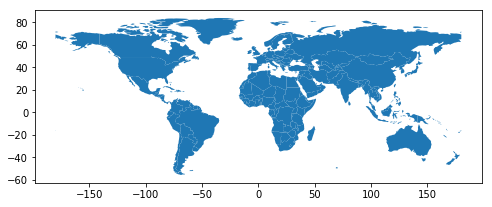

In [4]:
#shapefile for map
shapefile = 'shapefile/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.info()
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

fig,ax = plt.subplots(figsize = (8,8))
gdf.plot(ax = ax)
plt.show()

In [5]:
#want to plot the confirmed cases and deaths onto this graph for each Country/Region


In [6]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
df.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4508,4509,03/09/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4509,4510,03/09/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4510,4511,03/09/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4511,4512,03/09/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4512,4513,03/09/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 8 columns):
SNo                4513 non-null int64
ObservationDate    4513 non-null object
Province/State     2912 non-null object
Country/Region     4513 non-null object
Last Update        4513 non-null object
Confirmed          4513 non-null float64
Deaths             4513 non-null float64
Recovered          4513 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 282.1+ KB


In [22]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [9]:
df_most_confirmed = df[df['Confirmed'] > 50]

In [20]:
df_most_confirmed['Country/Region'].value_counts()

Mainland China    1163
Others              32
Singapore           26
Hong Kong           26
Japan               23
South Korea         19
Italy               17
Iran                15
France              11
Germany             10
Spain                9
US                   8
Kuwait               8
Switzerland          7
UK                   7
Norway               6
Bahrain              6
Netherlands          5
Sweden               5
Austria              4
Malaysia             4
Belgium              4
Iraq                 3
Greece               2
Denmark              1
Iceland              1
Egypt                1
Name: Country/Region, dtype: int64

In [11]:
#incubation period compared to confirmed???
#want to plot the deaths over time for mainland china and other major countries
df_Mainland_China = df[df['Country/Region']=='Mainland China']
df_Italy = df[df['Country/Region']=='Italy']
df_Iran = df[df['Country/Region']=='Iran']
df_US = df[df['Country/Region']=='US']
df_Spain = df[df['Country/Region']=='Spain']

In [12]:
print(len(df_Mainland_China))
print(len(df_Italy))
print(len(df_Iran))
print(len(df_US))
print(len(df_Spain))

1482
39
20
899
38


In [13]:
df_Mainland_China.loc[:,'Total Confirmed'] = df_Mainland_China['Confirmed'].cumsum()
df_Mainland_China.loc[:,'Total Deaths'] = df_Mainland_China['Deaths'].cumsum()
df_Mainland_China.loc[:,'Total Recovered'] = df_Mainland_China['Recovered'].cumsum()

df_Italy.loc[:,'Total Confirmed'] = df_Italy['Confirmed'].cumsum()
df_Italy.loc[:,'Total Deaths'] = df_Italy['Deaths'].cumsum()
df_Italy.loc[:,'Total Recovered'] = df_Italy['Recovered'].cumsum()

df_Iran.loc[:,'Total Confirmed'] = df_Iran['Confirmed'].cumsum()
df_Iran.loc[:,'Total Deaths'] = df_Iran['Deaths'].cumsum()
df_Iran.loc[:,'Total Recovered'] = df_Iran['Recovered'].cumsum()

df_US.loc[:,'Total Confirmed'] = df_US['Confirmed'].cumsum()
df_US.loc[:,'Total Deaths'] = df_US['Deaths'].cumsum()
df_US.loc[:,'Total Recovered'] = df_US['Recovered'].cumsum()

df_US.loc[:,'Total Confirmed'] = df_US['Confirmed'].cumsum()
df_US.loc[:,'Total Deaths'] = df_US['Deaths'].cumsum()
df_US.loc[:,'Total Recovered'] = df_US['Recovered'].cumsum()

df_US.loc[:,'Total Confirmed'] = df_US['Confirmed'].cumsum()
df_US.loc[:,'Total Deaths'] = df_US['Deaths'].cumsum()
df_US.loc[:,'Total Recovered'] = df_US['Recovered'].cumsum()

/Users/Brittney/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Brittney/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/Users/Brittney/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


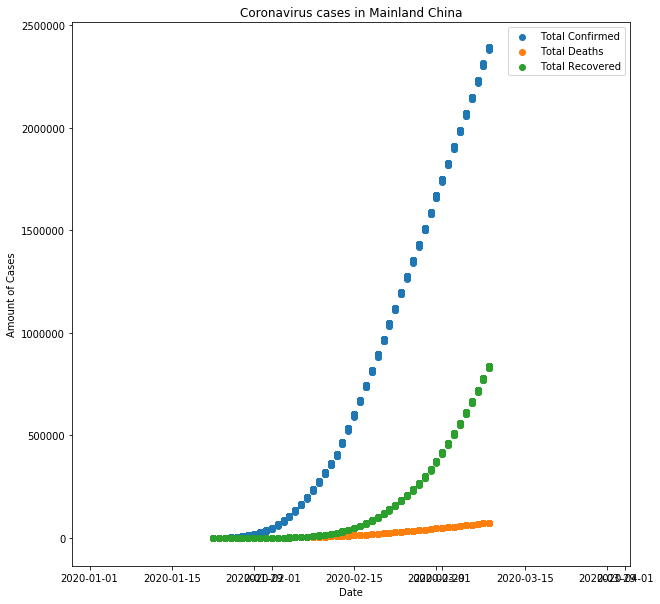

In [15]:
# China so many cases, need to be on a separate plot or inset plot
x_c = df_Mainland_China['ObservationDate'] 
y_c = df_Mainland_China['Total Confirmed']

x_d = df_Mainland_China['ObservationDate'] 
y_d = df_Mainland_China['Total Deaths']

x_r = df_Mainland_China['ObservationDate'] 
y_r = df_Mainland_China['Total Recovered']

x_points_c = pd.to_datetime(x_c)
x_points_d = pd.to_datetime(x_d)
x_points_r = pd.to_datetime(x_r)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_points_c,y_c)
ax.scatter(x_points_d,y_d)
ax.scatter(x_points_r,y_r)

ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Coronavirus cases in Mainland China")
ax.legend(('Total Confirmed','Total Deaths','Total Recovered'))

plt.show()

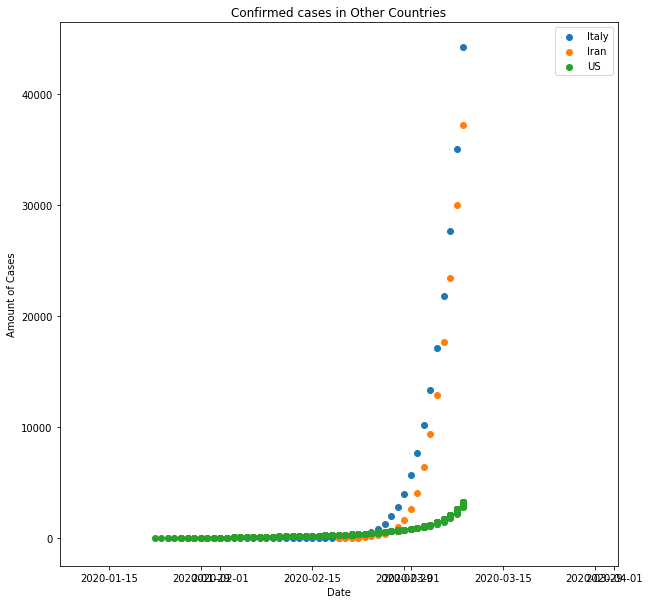

In [17]:
#Total Confirmed Cases plot

x_2 = df_Italy['ObservationDate'] 
y_2 = df_Italy['Total Confirmed']

x_3 = df_Iran['ObservationDate'] 
y_3 = df_Iran['Total Confirmed']

x_4 = df_US['ObservationDate'] 
y_4 = df_US['Total Confirmed']

x_points_2 = pd.to_datetime(x_2)
x_points_3 = pd.to_datetime(x_3)
x_points_4 = pd.to_datetime(x_4)

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(x_points_2,y_2)
ax.scatter(x_points_3,y_3)
ax.scatter(x_points_4,y_4)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Confirmed cases in Other Countries")
ax.legend(('Italy','Iran','US'))

plt.show()

In [18]:
df_Italy.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total Confirmed,Total Deaths,Total Recovered
3397,3398,03/05/2020,NaN,Italy,2020-03-05T17:43:03,3858.0,148.0,414.0,17147.0,522.0,1227.0
3571,3572,03/06/2020,NaN,Italy,2020-03-06T17:33:03,4636.0,197.0,523.0,21783.0,719.0,1750.0
3769,3770,03/07/2020,NaN,Italy,2020-03-07T17:33:03,5883.0,233.0,589.0,27666.0,952.0,2339.0
3993,3994,03/08/2020,NaN,Italy,2020-03-08T18:03:04,7375.0,366.0,622.0,35041.0,1318.0,2961.0
4248,4249,03/09/2020,NaN,Italy,2020-03-09T18:13:11,9172.0,463.0,724.0,44213.0,1781.0,3685.0


In [ ]:
#plot each total confirmed, deaths on a country map
